# 4.10 Coding etiquette & Excel Reporting

### This script contains the following points:

#### 1. Determine the null values in median_order_frequency flag
#### 2. Drop PII data and unnecessary columns
#### 3. Create a region flag from the State column
#### 4. Create a flag for low-activity customers
#### 5. Prepare dataframes for concat and combine them
#### 6. Remove low-activity customers from the new dataframe

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a path to data

path = r'/Users/nekow/Documents/Instacart Basket Analysis'

In [3]:
# Importing the instacart dataframe

sec_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_dataset.pkl'))

## 1. Determine the null values in median_order_frequency

In [4]:
# Moving null in statistical to a separate dataframe

one_time_buyer = sec_instacart[sec_instacart['median_order_frequency'].isnull() == True]

### Null values are from a one-time buyer for instacart that purchased multiple times.

In [5]:
sec_instacart

,user_id,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,...,reordered,price_range,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order_frequency,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Mid-range product,Average Days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,NaN,Average Days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,NaN,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,0,NaN,Average Days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer
32404855,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,0,NaN,Average Days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer
32404856,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,0,NaN,Average Days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer
32404857,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,0,NaN,Average Days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer


## 2. Drop PII data and unnecessary columns

### Step 2 of Exercise 4.10

In [6]:
# Last names are a security implication for PII, removing them is the saftest approach

instacart = sec_instacart.drop(columns = ['Last Name','First Name'])

In [7]:
# Extracting the null values from the dataset

instacart.dropna(inplace = True)

## 3. Create a region flag from the State column

### Step 3 of Exercise 4.10

In [8]:
# Define the regions

regions = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"],
    "Midwest": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"],
    "South": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"],
    "West": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"]
}

In [9]:
# Create a function to map states to regions

def state_to_region(State):
    for region, states in regions.items():
        if State in states:
            return region
    return "State not found"

In [10]:
# Create a new column 'region' in the DataFrame

instacart['region'] = instacart['State'].apply(state_to_region)

In [11]:
instacart['region'].value_counts(dropna = False)

region
South        311117
West         239019
Midwest      218395
Northeast    165264
Name: count, dtype: int64

## 4. Create a flag for low-activity customers

### Step 4 of Exercise 4.10

In [13]:
# Creating a locator for high customer activity

instacart.loc[instacart['max_order']>5, 'customer_activity'] = 'High activity' 

/var/folders/hs/djjm__mn4d33wxms4t4q0flh0000gp/T/ipykernel_28182/2146824018.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High activity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  instacart.loc[instacart['max_order']>5, 'customer_activity'] = 'High activity'


In [14]:
# Creating a locator for low customer activity

instacart.loc[instacart['max_order']<=5, 'customer_activity'] = 'Low activity'

In [15]:
instacart.head(10)

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order_frequency,order_frequency_flag,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Average Days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
18,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,Average Days,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity
19,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity
20,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,Average Days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity
21,33890,Female,New Mexico,36,1/1/2017,0,single,59285,890,Organic Diced Tomatoes,...,Average Days,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity
91,65803,Male,Idaho,35,1/1/2017,2,married,99568,196,Soda,...,Average Days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity
92,65803,Male,Idaho,35,1/1/2017,2,married,99568,196,Soda,...,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity
93,65803,Male,Idaho,35,1/1/2017,2,married,99568,196,Soda,...,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity


In [13]:
# Create a crosstabe to visualize the new 'region' column

region_activity_crosstab = pd.crosstab(instacart['order_frequency_flag'], instacart['region'],dropna = False)

(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

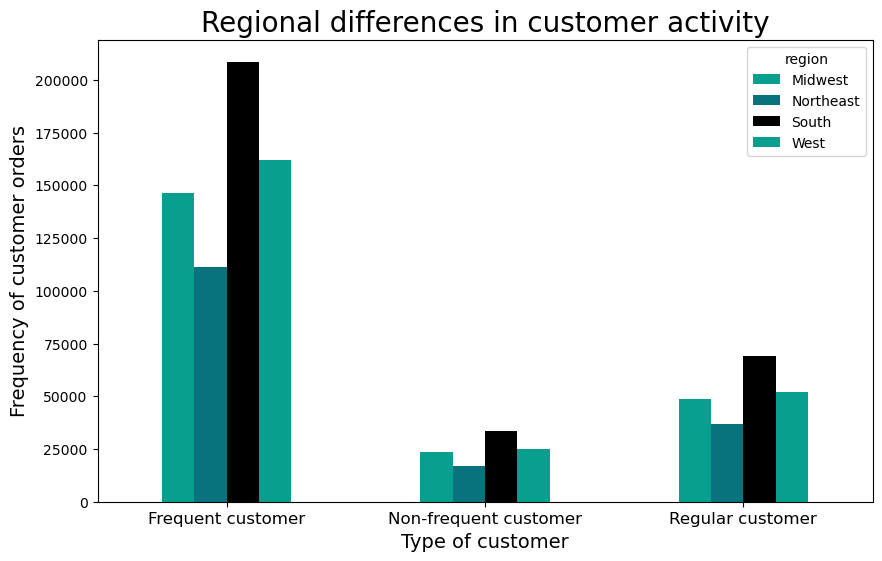

In [14]:
# Create a graphh that visualizes the new 'region' column

region_activity_bar = region_activity_crosstab.plot(kind = 'bar',figsize=(10,6),color=['#089f8f','#08737f', '#000000']) 
region_activity_bar.legend(title = 'region') 
plt.title('Regional differences in customer activity', fontsize = 20) 
plt.ylabel('Frequency of customer orders',fontsize=14) 
plt.xlabel('Type of customer',fontsize=14) 
plt.xticks(rotation=0,fontsize=12)

In [ ]:
region_activity_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','reg_act_bar.png'))

## 5. Remove low-activity customers from the new dataframe

In [ ]:
# Create a dataframe with only regular customer activity

instacart_active = instacart[instacart['customer_activity'] == 'High activity']

In [ ]:
instacart_active.describe()

In [ ]:
# Export the new dataframe

instacart_active.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_act_cust.pkl'))